In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("D:\\Datasets\\OnlineRetail2.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df["TotalPrice"] = df.Quantity * df.UnitPrice

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
TotalPrice     541909 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [11]:
# Ülkelere göreortalama satışlar
df_grp_country = df.groupby(["Country"]).TotalPrice.agg(['mean']).sort_values("mean",ascending=False)
df_grp_country.head()

,mean
Country,
Netherlands,120.059696
Australia,108.877895
Japan,98.716816
Sweden,79.211926
Denmark,48.247147


# Pandas ile bar grafik çizme

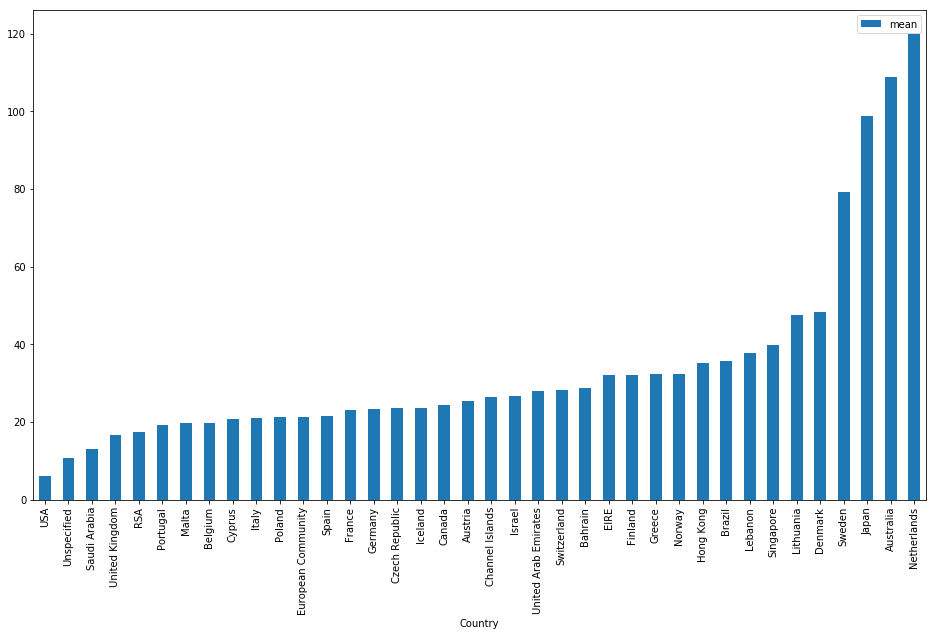

In [8]:
df_grp_country.plot(kind='bar', figsize=(16,9))

In [9]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [10]:
df.Country.unique().shape

(38,)

In [11]:
df_grp_country['mean'].shape

(38,)

In [9]:
# Ülkelere göre ortalama satış grafiği

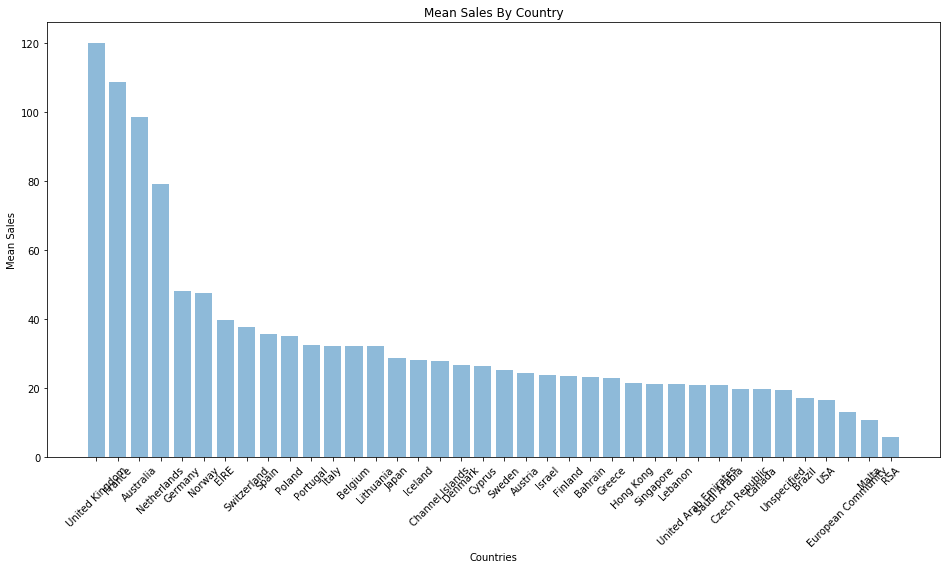

In [12]:
x = df.Country.unique()
y = df_grp_country['mean']


y_pos = range(len(x))
plt.figure(figsize=(16,8)) 
plt.bar(y_pos, y, align='center', alpha=0.5) # alfa saydamlık derecesi
plt.xticks(y_pos, x)
plt.xlabel('Countries')
plt.xticks(rotation=45)
plt.ylabel('Mean Sales')
plt.title('Mean Sales By Country')
 
plt.show()

# Font size değişimi

In [13]:
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['font.family'] = 'sans-serif'
# Detaylı ayarlar: https://matplotlib.org/users/customizing.html

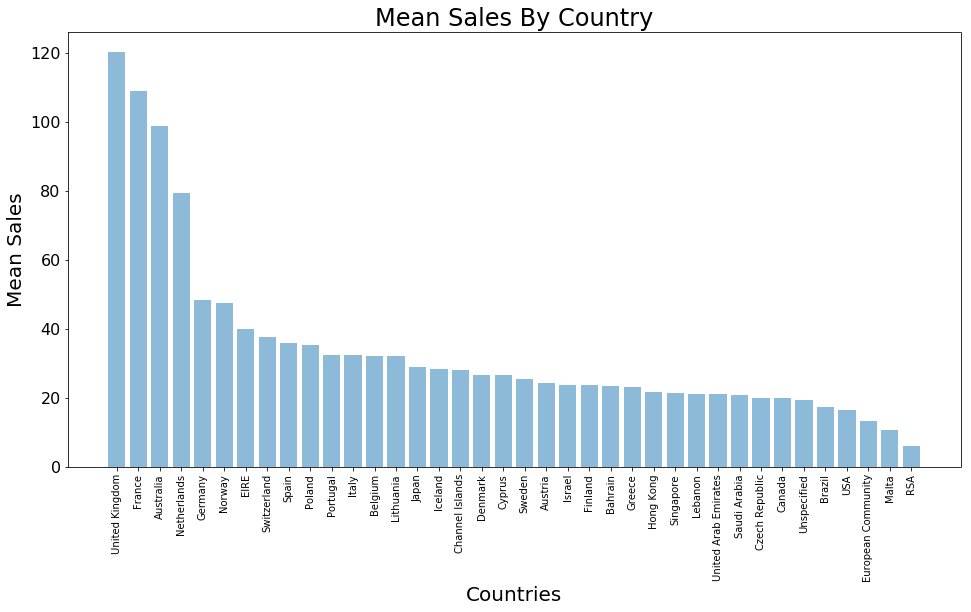

In [14]:
# Generating the y positions. Later, we'll use them to replace them with labels.

x = df.Country.unique()
y = df_grp_country['mean']

y_pos = range(len(x))
performance = y
plt.figure(figsize=(16,8)) 
plt.bar(y_pos, performance, align='center', alpha=0.5) # alfa saydamlık derecesi
plt.xticks(y_pos, x)
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.ylabel('Mean Sales')
plt.title('Mean Sales By Country')
 
plt.show()

# Aylara göre ortalama satış grafiği

In [17]:
df = pd.read_csv("D:\\Datasets\\OnlineRetail2.csv",
                 parse_dates=['InvoiceDate'], index_col="InvoiceDate")

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [19]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [20]:
df['month'] = df.index.month

In [21]:
# Ayların isimleri ile rakamları eşleştiren fonksiyon
def month_switch(i):
        switcher={
                
                1:'Ocak',
                2:'Şubat',
                3:'Mart',
                4:'Nisan',
                5:'Mayıs',
                6:'Haziran',
                7:'Temmuz',
                8:'Ağustos',
                9:'Eylül',
                10:'Ekim',
                11:'Kasım',
                12:'Aralık'
             }
        return switcher.get(i)

In [22]:
# Pandas dataframe month series içinde dolaşarak paterne uygun eşleştirme yapalım
months = []
for i in df.month:
    months.append(month_switch(i))

In [23]:
# Oluşturduğumuz paterni taşıyan listeyi yeni bir sütun olarak dataframe e ekleyelim
df["month_names"] = months

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalPrice,month,month_names
InvoiceDate,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,12,Aralık
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,12,Aralık
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,12,Aralık
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,12,Aralık
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,12,Aralık


In [24]:
df_month_grp = df \
.groupby(['month_names']).TotalPrice \
.agg(['sum']) \
.sort_values('sum',ascending=False) \

In [25]:
df_month_grp.head()

,sum
month_names,
Kasım,1461756.250
Aralık,1182625.030
Ekim,1070704.670
Eylül,1019687.622
Mayıs,723333.510


In [15]:
df_month_grp.index.unique()

Index(['Kasım', 'Aralık', 'Ekim', 'Eylül', 'Mayıs', 'Haziran', 'Mart',
       'Ağustos', 'Temmuz', 'Ocak', 'Şubat', 'Nisan'],
      dtype='object', name='month_names')

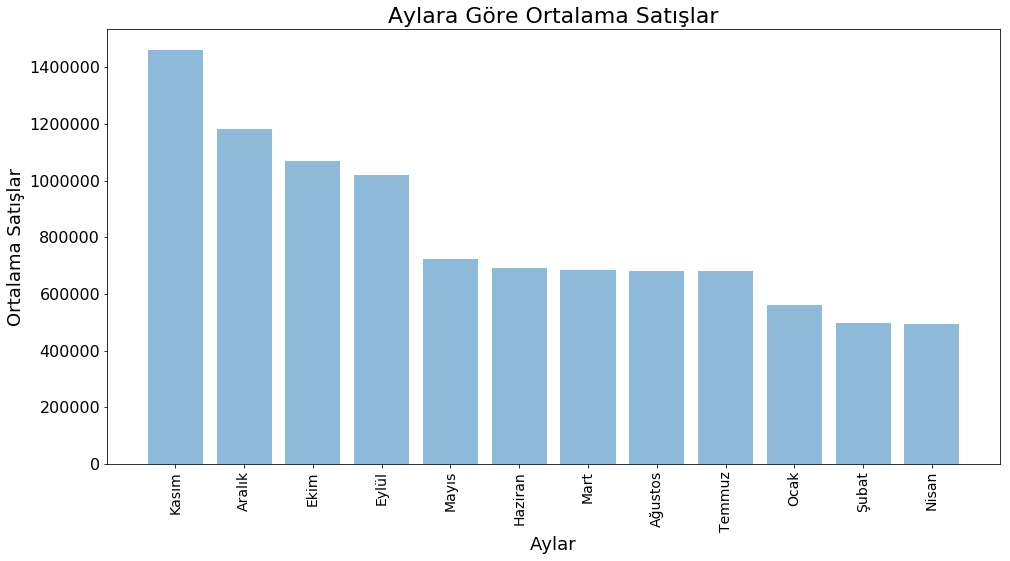

In [26]:
# Generating the y positions. Later, we'll use them to replace them with labels.

x = df_month_grp.index.unique()
y = df_month_grp['sum']


y_pos = range(len(x))
performance = y
plt.figure(figsize=(16,8)) 
plt.bar(y_pos, performance, align='center', alpha=0.5) # alfa saydamlık derecesi
plt.xticks(y_pos, x, fontsize=14)
plt.xlabel('Aylar', fontsize=18)
plt.xticks(rotation=90)
plt.ylabel('Ortalama Satışlar', fontsize=18)
plt.title('Aylara Göre Ortalama Satışlar', fontsize=22)
plt.show()

# Ödev-18

In [25]:
# OnlineRetail2.csv veri setini kullanarak günlere göre (Türkçe gün isimleriyle) ortalama satışları
# gösteren bar grafiği çiziniz.